In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.metrics import log_loss, accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
dataset = pd.read_csv('/content/train_data_cleaned (1).csv')

In [ ]:
dataset.head()

,Customer_ID,outlet_city_0,outlet_city_1,outlet_city_2,outlet_city_3,outlet_city_4,luxury_sales,fresh_sales,dry_sales,cluster_category
0,10493832.0,0,0,0,0,1,1209.60,756.00,5292.00,4
1,10178643.0,0,0,0,1,0,1590.12,1060.08,6007.12,1
2,10513916.0,0,0,0,1,1,2288.88,1481.04,9155.52,4
3,10334589.0,0,0,0,1,1,2274.94,1739.66,9099.76,4
4,10458365.0,0,0,0,0,1,2345.49,2069.55,9243.99,4


In [ ]:
X = dataset[['luxury_sales', 'fresh_sales', 'dry_sales','outlet_city_0','outlet_city_1','outlet_city_2','outlet_city_3','outlet_city_4']]
y = dataset["cluster_category"]

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_data = scaler.fit_transform(dataset[['luxury_sales', 'fresh_sales', 'dry_sales']])
# Creating a DataFrame with the scaled data and original column names
scaled_df = pd.DataFrame(scaled_data, columns=['luxury_sales', 'fresh_sales', 'dry_sales'], index=dataset.index)

# Updating the original DataFrame with the scaled values
dataset[['luxury_sales', 'fresh_sales', 'dry_sales']] = scaled_df[['luxury_sales', 'fresh_sales', 'dry_sales']]
dataset.head()

,Customer_ID,outlet_city_0,outlet_city_1,outlet_city_2,outlet_city_3,outlet_city_4,luxury_sales,fresh_sales,dry_sales,cluster_category
0,10493832.0,0,0,0,0,1,-0.439830,-0.449339,0.324965,4
1,10178643.0,0,0,0,1,0,-0.074139,-0.391966,0.452208,1
2,10513916.0,0,0,0,1,1,0.597391,-0.312540,1.012410,4
3,10334589.0,0,0,0,1,1,0.583994,-0.263745,1.002488,4
4,10458365.0,0,0,0,0,1,0.651795,-0.201502,1.028152,4


In [ ]:
y_adjusted = y - 1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_adjusted, test_size=0.3, random_state=42, stratify=y_adjusted)

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:22:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_train_pred = xgb_model.predict(X_train) + 1  # Convert back to original {1,2,3,4,5,6}
y_test_pred = xgb_model.predict(X_test) + 1    # Convert back to original {1,2,3,4,5,6}

In [ ]:
train_accuracy = accuracy_score(y_train + 1, y_train_pred)  # Convert y_train back to {1,2,3,4,5,6}
test_accuracy = accuracy_score(y_test + 1, y_test_pred)

In [ ]:
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9998
Test Accuracy: 0.9998


In [ ]:
print("\nClassification Report (Train Set):\n", classification_report(y_train + 1, y_train_pred))


Classification Report (Train Set):
               precision    recall  f1-score   support

           1       1.00      1.00      1.00    132285
           2       1.00      1.00      1.00    108542
           3       1.00      1.00      1.00     16879
           4       1.00      1.00      1.00    120702
           5       1.00      1.00      1.00     20507
           6       1.00      1.00      1.00    118446

    accuracy                           1.00    517361
   macro avg       1.00      1.00      1.00    517361
weighted avg       1.00      1.00      1.00    517361



In [ ]:
print("\nClassification Report (Test Set):\n", classification_report(y_test + 1, y_test_pred))


Classification Report (Test Set):
               precision    recall  f1-score   support

           1       1.00      1.00      1.00     56694
           2       1.00      1.00      1.00     46518
           3       1.00      1.00      1.00      7233
           4       1.00      1.00      1.00     51730
           5       1.00      1.00      1.00      8789
           6       1.00      1.00      1.00     50763

    accuracy                           1.00    221727
   macro avg       1.00      1.00      1.00    221727
weighted avg       1.00      1.00      1.00    221727




Confusion Matrix (Train Set):


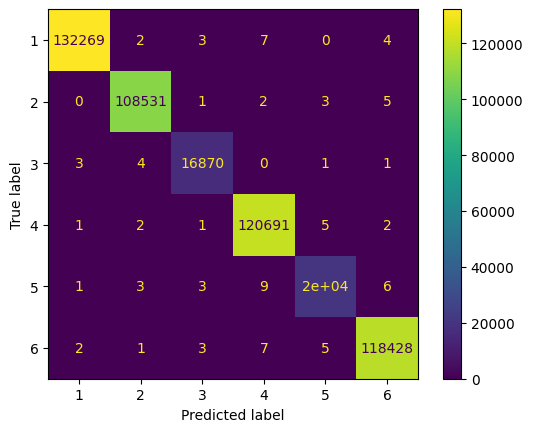

In [ ]:
cm_train = confusion_matrix(y_train + 1, y_train_pred)
disp_train = ConfusionMatrixDisplay(cm_train, display_labels=[1, 2, 3, 4, 5, 6])
print("\nConfusion Matrix (Train Set):")
disp_train.plot()


Confusion Matrix (Test Set):


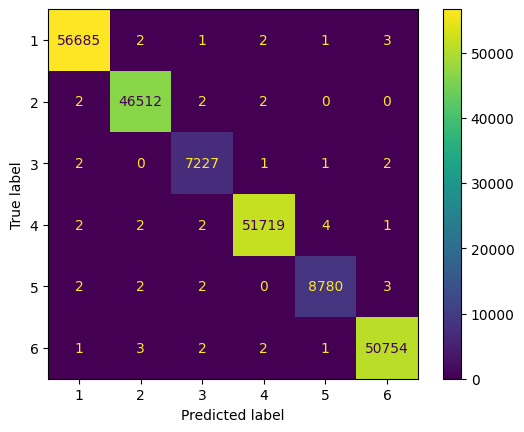

In [ ]:
cm_test = confusion_matrix(y_test + 1, y_test_pred)
disp_test = ConfusionMatrixDisplay(cm_test, display_labels=[1, 2, 3, 4, 5, 6])
print("\nConfusion Matrix (Test Set):")
disp_test.plot()

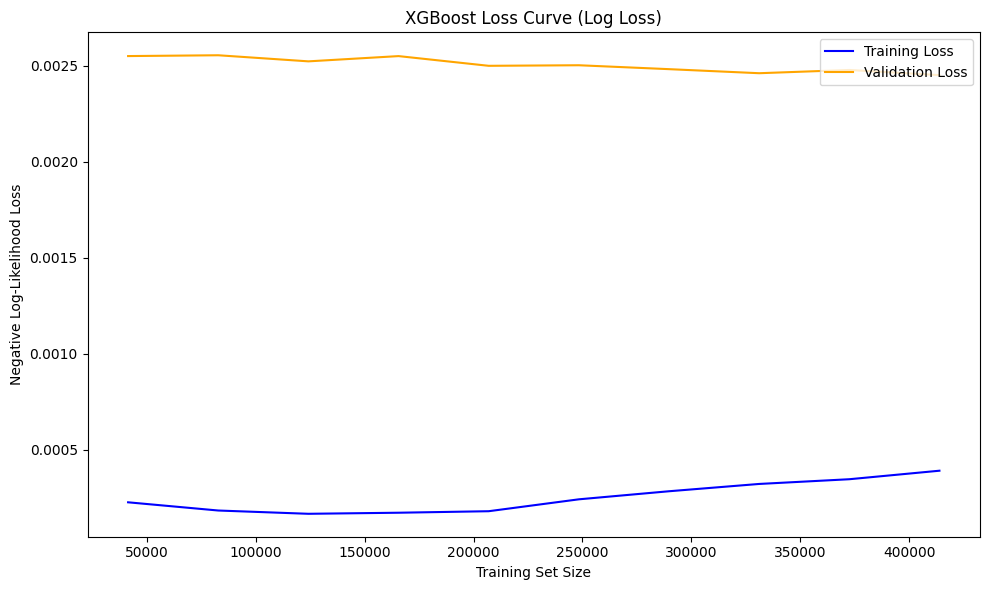

In [ ]:
# Step 1: Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.metrics import log_loss

# Step 4: Initialize XGBoost Model
xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)

# Step 5: Compute Learning Curve (using negative log loss)
train_sizes, train_scores, test_scores = learning_curve(
    xgb,
    X_train,
    y_train,
    cv=5,
    scoring="neg_log_loss",  # log loss expects probability predictions
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)

# Step 6: Process and Plot the Learning Curve
# Compute mean log losses (negated to make them positive)
train_mean = -np.mean(train_scores, axis=1)
val_mean = -np.mean(test_scores, axis=1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, '-', label="Training Loss", color='blue')
plt.plot(train_sizes, val_mean, '-', label="Validation Loss", color='orange')
plt.xlabel("Training Set Size")
plt.ylabel("Negative Log-Likelihood Loss")
plt.title("XGBoost Loss Curve (Log Loss)")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


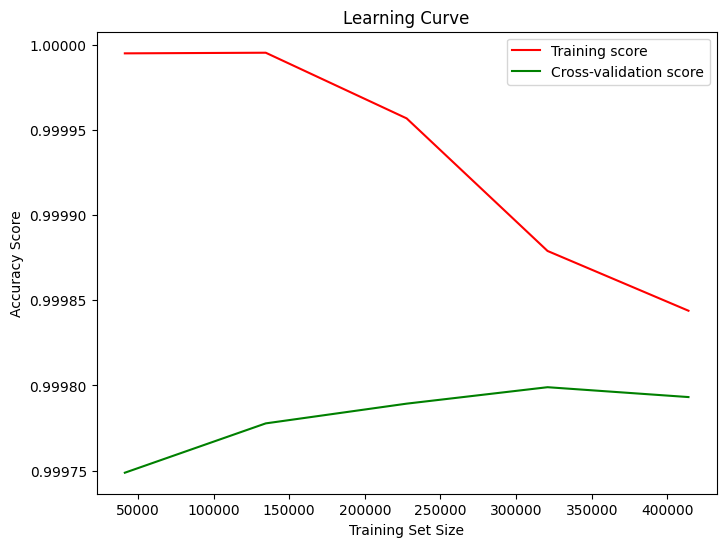

In [ ]:
from sklearn.model_selection import learning_curve
from xgboost import XGBClassifier
import numpy as np
import matplotlib.pyplot as plt

# Define the model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Generate learning curve scores
train_sizes, train_scores, test_scores = learning_curve(
    xgb, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1
)

# Calculate mean scores
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, '-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, '-', color="g", label="Cross-validation score")

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()
